In [1]:
from cvxopt import matrix , solvers
import numpy as np
import matplotlib.pyplot as plt

# generate data
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.4, .2], [.2, .4]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.ones((N, 1)), -1*np.ones((N, 1))), axis = 0)

print("X:")
print(X)
print("y:")
print(y)

# draw data
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

plt.axis('equal')

# axis limits
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.show()

# Create matrices and vectors (primamy problem)
P = np.array([[1,0,0],[0,1,0],[0,0,0]])
P = P.astype('double')
K = matrix(P)
q = matrix(np.zeros((3,1)))
G = np.concatenate((X, np.ones((2*N, 1))), axis = 1) * np.concatenate((-y, -y, -y), axis = 1)
G = matrix(G)
h = matrix(-np.ones((2*N, 1)))

# solve
solvers.options['show_progress'] = False
solultion = solvers.qp(K,q,G,h)

# obtain solution
w = np.array(solultion['x'])

print(w)

X:
[[ 2.51311515  1.58761094]
 [ 1.48315956  1.33179703]
 [ 2.58594875  1.95205627]
 [ 1.84573985  1.14774162]
 [ 1.83442165  1.47928915]
 [ 2.05717039  1.91122041]
 [ 1.44017115  1.91597856]
 [ 2.24583793  2.91369352]
 [ 1.25376001  1.92712061]
 [ 1.63812832  0.69665315]
 [ 3.48676741  0.47571575]
 [ 4.24719756  2.46054062]
 [ 3.22773047  1.62563566]
 [ 3.62540086  1.97688783]
 [ 4.58873019  2.60371608]
 [ 3.41856133 -0.15627217]
 [ 4.1594917   2.09778715]
 [ 4.52880464  2.4423396 ]
 [ 4.02349473  1.86479295]
 [ 4.38632632  1.70000824]]
y:
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


<Figure size 640x480 with 1 Axes>

[[-2.82878966]
 [ 0.5653273 ]
 [ 7.21155436]]


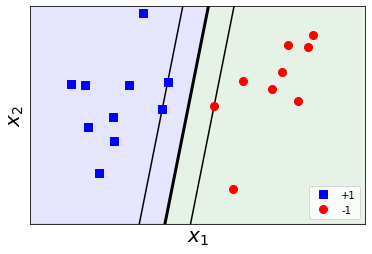

In [2]:
# Draw
# plot points
fig, ax = plt.subplots()

x1 = np.arange(-10, 10, 0.1)
y1 = -w[0, 0]/w[1, 0]*x1 - w[2, 0]/w[1, 0]
y2 = -w[0, 0]/w[1, 0]*x1 - (w[2, 0]-1)/w[1, 0]
y3 = -w[0, 0]/w[1, 0]*x1 - (w[2, 0]+1)/w[1, 0]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')

y4 = 10*x1
plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='green', alpha='0.1')
plt.fill_between(x1, y1, y4, color = 'blue', alpha = '0.1')

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1, label = '+1')
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1, label = '-1')

plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

plt.legend(loc = 'lower right')
plt.show()